# Application of Healthcare Queueing Models to Online Triage Systems in Primary Care

University of Exeter, MSc Data Science of HealthCare.

HPDM139 Coding for ML and DS, assignment 1, October 2025.



## Introduction: Queueing in Healthcare

Queues are common in healthcare systems, due to the potential for mismatch between people arriving to use the servive, and the availability of healthcare workers to meet that demand immediately. A queuing model describes the flow of servive-users into and through a system.  

In this assignment, I consider how queueing models can be applied to online triage systems in primary care. This will allow some insights into the efficient design and implemenation of such triage systems.

## Triage in Primary Care

The average GP practice in the UK in 2023 had 9,724 patients (Pettigrew, 2024). Collectively, England's GP surgeries offer over 36 million appointments per year (NHS Digital, 2022).

On 1st October 2025, it became mandatory for GP surgeries to offer online appointment requests (although many GP surgeries were already operating this way). Patients must be able to request appointments online throughout the day, rather than phoning their surgery or visiting in person (https://www.gov.uk/government/news/online-gp-appointment-requests-available-everywhere-from-today)

In online triage, patient requests arrive at unpredictable times, and only a limited number of clinicians are available to respond. Queueing theory provides a way to study this systems mathematically. It can help answer practical questions such as:

- How long will patients wait on average?
- How long can a clinician spend on each patient, to keep waiting times acceptable?
- How many staff are needed to keep waiting times acceptable?
- Is it more effective to add an extra staff member, or to make each consultation a little faster?

## Study Design

In this project three queueing models are implemented in python. For each model, two experiments are run. The experiments explore how arrival rate, consultation length, and number of staff affect waiting times and resource utilisation, and how this can help the organisation to meet service targets.

Model 1 considers the scenario where a single GP is triaging and signposting patient requests. Both arrival rate and service rate are assumed to vary randomly.

Model 2 extends this scenario. Rather than signpost to another healthcare professional, the triaging GP can choose to address the issue and attempt to "complete" the request- for example, by speaking with the patient and prescribing medication. Completing the request is assumed to take longer than signposting, and questions follow about which is the most efficient stratey within the capacity of the system at any given time.

Model 3 considers a scenario where multiple GPs are triaging - perhaps across sites in a group practice, or in a regional out-of-hours primary care hub.

The input variables considered are:

- arrival rate, ($\lambda$)
- servive rate, ($\mu$)
- consultation length or service time, $S$
- number of triagers or servers, $s$

The key performance measures output are:

- Utilisation factor, ($\rho$)  
- Mean waiting time to be triaged or served, $W_q$  
- Delay probability, eg. $P(wait > 30 min)$


## Model 1: GP Same‚Äëday Triage (M/M/1)

In queueing theory, a M/M/1 queue represents the queue length in a system having a single server, where arrivals occur at rate ($\lambda$) according to a Poisson process, and service times have an exponential distribution with rate parameter ($\mu$), where ($\frac{1}{\mu}$) is the mean service time.

## Experiment 1: Utilisation ramp

Experiment 1 is a stress test of a such a system, where a single GP "serves" same day triage, modelled as a M/M/1 queue.

In this experiment, service rate is fixed at $(\mu)$ = 12 patients/hour (‚âà5 minutes per patient), and arrival rate $(\lambda)$ is ramped up from 4 to 11 patients per hour.

The utilisation factor $(\rho)$ - which is the fraction of time the GP is busy- and the average wating time before triage $(W_q)$ are plotted against the arrival rate $(\lambda)$.

The formula used are:

   $$\rho = \frac{\lambda}{\mu}$$

   $$W_q = \frac{\rho}{\mu - \lambda}$$


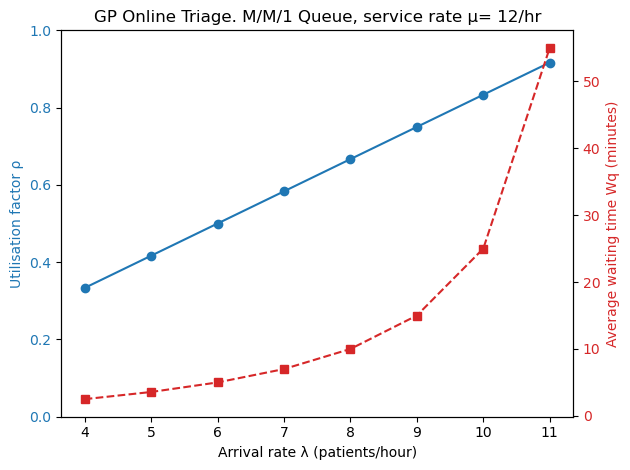

In [53]:
"""
Experiment 1: Utilisation Ramp (M/M/1)
-------------------------------------------------
Model a single-GP triage system using an M/M/1 queue.
Plot arrival rate (lambda) against utilisation (rho) and average waiting time (wq).

Assumptions:
- Poisson arrival times (random and memoryless)
- Exponential service times
- service rate (mu) averages 12 patients/hour
"""

import matplotlib.pyplot as plt
import numpy as np


def calculate_utilisation_and_wait(mu: float, lambdas: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    calculate utilisation (rho) and mean wait time (q)
    
    Parameters:
    mu : float
        service rate (patients per hour)
    lambdas: np,ndarray
        Array of arrival rates (patients per hour)

    Returns:
    tuple[np.ndarray, np.darray]
        arrays of utilisation (rho) and waiting time (Wq) in minutes.
    """
    rho = lambdas / mu
    wq_hours = rho / (mu - lambdas)
    wq_minutes = wq_hours * 60
    return rho, wq_minutes


def plot_utilisation_and_wait(lambdas: np.ndarray, rho: np.ndarray, wq: np.ndarray) -> None:
     
    """
    Plot lambda vs rho and Wq
    
    Parameters:
    lambdas : np.ndarray
        Array of arrival rates (patients per hour)
    rho : np.ndarray
        Array of utilisation factors 
    wq: np.ndarray
        Array of waiting times (minutes)
    """
    fig, ax1 = plt.subplots()
    
    # plot utilisation on left Y axis
    ax1.plot(lambdas, rho, 'o-', color='tab:blue', label = 'Utilisation (œÅ)')
    ax1.set_xlabel("Arrival rate Œª (patients/hour)")
    ax1.set_ylabel("Utilisation factor œÅ", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_ylim(0, 1)
    
    # Plot waiting time on the right y-axis
    ax2 = ax1.twinx()
    ax2.plot(lambdas, wq, 's--', color='tab:red', label='Waiting time Wq (minutes)')
    ax2.set_ylabel("Average waiting time Wq (minutes)", color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    
    # Title
    plt.title("GP Online Triage. M/M/1 Queue, service rate Œº= 12/hr")
    
    # Formatting
    fig.tight_layout()

    plt.show()


# --- Parameters ---
MU = 12.0 # service rate (patients/hour)
# Arrival rate lambda varies from 4 to 11 patients/hour
lambdas = np.array([i for i in range (4,12)], dtype=float)


# --- Execution ---
# Calculate ulitisation and wait
rho, wq = calculate_utilisation_and_wait(MU, lambdas)

# Plot results
plot_utilisation_and_wait(lambdas, rho, wq) 

### Experiment 1: Results

This experiment shows that while resource utilisation rises linearly with increased arrival rate, average waiting time increases sharply as the system approaches capacity. This is particularly seen when arrival rates exceed 9 patients per hour.

In order to plan such a service, the organisations must be able to predict demand in the form of arrival rates. Then they can allocate sufficient staff to meet the demand, without over-allocating staff and under-utilising.

At busy times, they may decide to allocate more than one GP to triage activity - a scenario considered in experiments 5 and 6.

## Experiment 2 ‚Äî Meeting service target

In this experiment, it is assumed that the organisation wants to meet a target that 90% of patient triage requests are started within 30 minutes.

Given this target, how long can the triaging GP spend on each case, with increasing arrivals rate (from 4 to 11 per hour)?

The probability that a patient's waiting time is less that t is:

$$P(W_q \le t) = 1 - e^{-(\mu - \lambda)t}$$

After rearranging for $(\mu)$ and setting P to the target of 0.9,

$$
0.1 = \frac{\lambda}{\mu} e^{-(\mu - \lambda)t}
$$

rearranged:

$$
\mu e^{\mu t} = \frac{\lambda}{0.1}\, e^{\lambda t}
$$

It is possible to solve equations where the unknown appears in both a linear and an exponential term using the Lambert W function (product log):

$$\mu = \frac{1}{t}\, W\!\left( \frac{\lambda t}{0.1}\, e^{\lambda t} \right)$$

In this experiment, $(\mu)$, the mean service time which can be allowed if the target is to be met, is plotted against $(\lambda)$, the request arrival rate. 

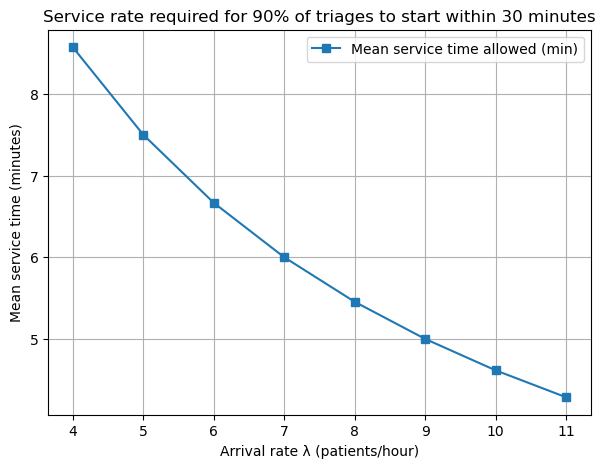

In [54]:
"""
Experiment 2: Meeting service target (M/M/1)
-------------------------------------------------
Model a single-GP triage system using an M/M/1 queue.
Plot arrival rate (lambda) against service rate (mu) required
to ensure that 90% of triage requests are started within
30 minutes.

Assumptions:
- Target: 90% start within 30 minutes
- Poisson arrival and exponential service times
"""

import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.special import lambertw

def calculate_required_mus(lambdas: np.ndarray, t: float = 0.5, target: float = 0.9) -> float:
    """
    Solve for Œº in the M/M/1 queue with the condition:
        P(wait ‚â§ t) = target
    where:
        target = 1 - (Œª/Œº) * exp(-(Œº - Œª)t)

    Parameters:
    lambdas : np.ndarray
        Array of arrival rates (patients per hour)
    t : float
        Target time (hours)
    target : float
        Target probability (e.g., 0.9 for 90%)

    Returns:
    np.ndarray
        Array of required service rates (patients per hour)
    """
    p = 1 - target
    required_mus = np.zeros_like(lambdas)
    for lam in lambdas:  
        arg = (lam * t / p) * math.exp(lam * t)
        mu = lambertw(arg).real / t
        required_mus[lambdas == lam] = mu   
    return required_mus


def plot_required_mus(required_mus: np.ndarray, lambdas: np.ndarray) -> None:
     
    """
    Plot required serivce times against arrival rates.
    
    Parameters:
    required_mus: np.ndarray 
        Array of the  required ervice rates (patients per hour).
    lambdas : np.ndarray
        Array of arrival rates (patient per hour)
    """
    plt.figure(figsize=(7, 5))
    plt.plot(lambdas, required_mus, marker='s', label='Mean service time allowed (min)')
    plt.xlabel('Arrival rate Œª (patients/hour)')
    plt.ylabel('Mean service time (minutes)')
    plt.title('Service rate required for 90% of triages to start within 30 minutes')
    plt.legend()
    plt.grid(True)

    plt.show()

# --- Parameters ---
T = 30 / 60  # 30 minutes in hours
target = 0.9 # 90% within target time
lambdas = np.arange(4, 12)  # 4 to 11 arrivals per hour


# --- Compute required Œº values ---
mus = calculate_required_mus(lambdas, T, target)
service_times = 60 / mus  # minutes per patient

plot_required_mus(service_times, lambdas)



### Experiment 2: results

As the arrival rate increases, the amount of time available for the triaging GP to deal with each case decreases, if they are to meet the organisation's target of starting 90% of triage requests within 90 minutes.

This experiment helps to quantify the time available per case. Considering demand on the service, an organisation might respond by implementing efficiencies to shorten the mean triage time (such as extra training, pairing GPs together with an administrative assistant, or an AI scribe to reduce data entry time). Or they may choose to allocate multiple GPs to triage at busy times. 

## Model 2: Completing versus signposting (M/G/1)

The triaging GP can choose to fully deal with each triage problem presented, thereby "completing" the case, or to refer the case to another provider to deal with. Completing the case usually takes longer than referring the case, and the following experiments investigate this.

Experiments 1 and 2 assumed exponential, memoryless service times, and so a M/M/1 queue model was used.

In Experiments 3 and 4 the triaging GP must choose between two service modes, complete or refer, with a general distribution of service times rather than an exponential distribution. The correct single-server model to use in this situation is M/G/1, standing for ‚ÄúMarkovian arrivals / General service / 1 server‚Äù.


## Experiment 3 - Complete or signpost? (M/G/1)

This experient models a single-server triage queue with Poisson arrivals at rate Œª per hour, and a two-point service-time distribution: 
- Complete, with probability $p$, and with mean time taken $S$ = 10 minutes;
- Refer, with probability $1-p$, and with mean time taken $S$ = 3 minutes.

The GP wishes to complete as many cases as possible, while meeting the service target that 90% of triage should start within 30 minutes. 

This experiment explores what proportion of triage cases should they aim to complete, and how this proportion varies with arrival rate ($\lambda$)

The average service time in minutes is:
$$\mathbb{E}[S]=10p+3(1-p)=3+7p$$
The effective service rate in hours is: $$\mu_{\text{effective}}(p) = \frac{1}{\mathbb{E}[S]/60}= \frac{60}{3 + 7p}$$
Because $0<=p<=1$:
$$p_{\max} = \min\!\left(1,\; \max\!\left(0,\; \frac{60/\mu_{\text{req}} - 3}{7}\right)\right)$$

The maximum proportion of cases that a GP can complete (rather than signpost) is plotted against a range of arrival rates ($\lambda$).


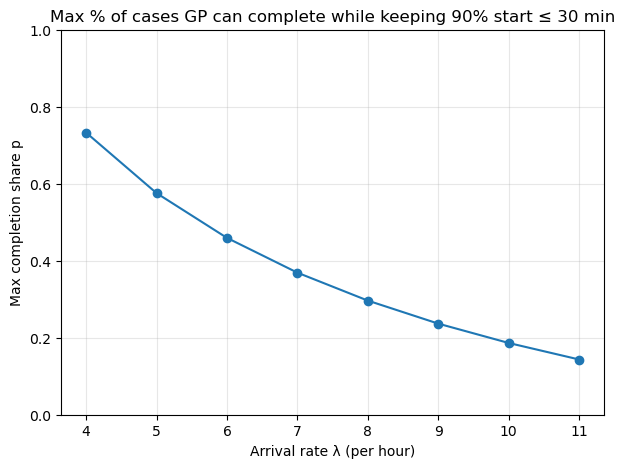

In [55]:
"""
Experiment 3: Complete or signpost? (M/G/1)
-------------------------------------------------
Model a single-GP triage system using an M/G/1 queue.
Plot the maximum proportion of full completions (p)
that can be sustained for different arrival rates (Œª),
while still meeting the service target that 90 % of
triage requests are started within 30 minutes.

Assumptions:
- Target: 90% start within 30 minutes
- Poisson arrival times
- Two-point service time distribution:
    - Complete, with probability p, mean time S1 = 10 minutes
    - Signpost, with probability (1-p), mean time S2 = 3 minutes
- Effective mean service time  E[S] = (7p + 3) minutes
    - Service rate  Œº = 60 / (7p + 3) patients per hour
"""

import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.special import lambertw


def calculate_mu_required(lam: float, t: float =30/60, target: float =0.9) -> float:
    """
    Solve for the required service rate Œº such that
    P(wait ‚â§ t) = target  in an M/G/1 queue.

    Parameters:
    lam : float
        arrival rate (patients per hour)
    t : float
        Target time (hours)
    target : float
        Target probability (e.g., 0.9 for 90%) 

    Returns:
    float
        required service rate (patients per hour)   
    """
    p = 1 - target
    arg = (lam * t / p) * math.exp(lam * t)
    return (lambertw(arg).real) / t


def pmax_from_mu(mus_required: np.ndarray) -> np.ndarray:
    """
    Compute the maximum feasible proportion of completed
    cases (p) given the required Œº value. Where
    p ‚â§ (60 / Œº ‚àí 3) / 7, clipped to [0, 1].

    Parameters:
    mus_required : np.ndarray
        Array of required service rates (patients per hour)
    
    Returns:
    np.ndarray
        Array of maximum feasible completion proportions (p)         
    """
    return np.clip((60 / mus_required - 3) / 7, 0, 1)


def plot_max_completion_share(pmax: np.ndarray, lambdas: np.ndarray) -> None:
    """
    Plot maximum feasible completion share against arrival rates.
    
    Parameters:
    pmax: np.ndarray 
        Array of the maximum fdeasible completion proportions (p).
    lambdas : np.ndarray
        Array of arrival rates (patient per hour)
    """
    plt.figure(figsize=(7, 5))
    plt.plot(lambdas, pmax, marker='o')
    plt.ylim(0,1); plt.grid(True, alpha=.3)
    plt.xlabel('Arrival rate Œª (per hour)')
    plt.ylabel('Max completion share p')
    plt.title('Max % of cases GP can complete while keeping 90% start ‚â§ 30 min')
    plt.show()
    

# --- Parameters ---
lambdas = np.arange(4, 12)        # arrivals per hour (4‚Äì11)
t = 30 / 60                       # target time (hours)
target = 0.9                       # target probability (90%)


# --- Execution ---
mus_required = np.array([calculate_mu_required(lam, t, target) for lam in lambdas])
pmax = pmax_from_mu(mus_required)
plot_max_completion_share(pmax, lambdas)

### Experiment 3: Results

As might be expected, as the request arrival rate increases, the proportion of cases which a GP can complete decreases, if they are to remain within the service target of starting 90% of requests within 30 minutes.

This experiment provides some quantative guides to enable the GP to consciously change their mode of operation, from "mainly complete" when the arrival rate is low, to "mainly signpost" when the arrival rate is high.

If the GP aims to complete too high a proportion of triage requests during busy periods, the waiting time may become unacceptable. This is explored in experiment 4.

## Experiment 4 - Mean waiting time (M/G/1)

This experiment uses the same model of a single-server triage queue with Poisson arrivals at rate ($\lambda$) per hour, and a two-point service-time distribution:
- Complete with probability $ùëù$ (S = 10 minutes = 1/6 hours);
- or signpost with probability $1-p$ (S = 3 minutes = 1/20 houra). 

In a M/G/1 model, service times ($S$) vary. And as the variance of service times increases, so does waiting time ($W_q$). A few long cases make everyone wait longer.

$$
\operatorname{Var}(S) = \mathbb{E}[S^2] - (\mathbb{E}[S])^2
$$

The Pollaczek‚ÄìKhinchine (M/G/1) formula reflects this, and yields the mean wait in the queue ($W_q$), contingent on arrival rate ($\lambda$) and completion rate ($p$)

$$W_q = \frac{\lambda\,\mathbb{E}[S^2]}{2\,(1 - \rho)} \quad \text{(hours)}$$

This experiment considers a range of arrival rates, and for each plots the completion rate ($p$) against the expected waiting time ($W_q$)



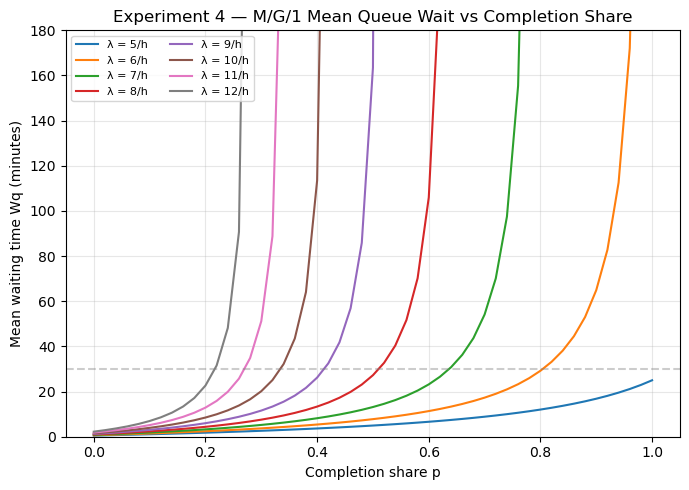

In [ ]:
"""
Experiment 4: Mean Waiting Time (M/G/1)
----------------------------------------

Model a single-GP triage system using an M/G/1 queue
with a two-point service-time distribution.

Objective:
Explore how the mean waiting time in the queue (Wq)
depends on the proportion of full completions (p)
and the arrival rate (Œª).

Assumptions:
- Poisson arrivals (rate Œª per hour)
- Service time distribution:
    ‚Ä¢ Complete: 10 minutes, probability p
    ‚Ä¢ Signpost: 3 minutes, probability (1-p)
- Mean service time  E[S] = (3 + 7p) minutes
- Mean squared service time  E[S¬≤] = (9 + 91p) minutes¬≤
- Pollaczek‚ÄìKhinchine (M/G/1) waiting-time formula:
    described in MD cell above
"""

import numpy as np
import matplotlib.pyplot as plt


def mean_wait(lam: float, p: float) -> np.ndarray:
    """
    Calculate the M/G/1 mean waiting time in queue (minutes)
    for a two-point service-time distribution:
        S1 = 10 min with probability p
        S2 =  3 min with probability (1 - p)

    Parameters
    ----------
    lam : float or np.ndarray
        Arrival rate Œª (per hour)
    p : float or np.ndarray
        Proportion of full 10-minute completions (0 ‚â§ p ‚â§ 1)

    Returns
    -------
    np.ndarray
        Mean waiting time in queue Wq (minutes)
    """
    # Expected service time and second moment in minutes
    ES_min  = 3 + 7 * p        # E[S]
    ES2_min = 9 + 91 * p       # E[S¬≤]

    # Convert to hours and hours¬≤
    ES_h  = ES_min / 60
    ES2_h = ES2_min / 3600

    # Utilisation factor clipped to [0:1]
    rho = lam * ES_h
    rho = np.clip(rho, None, 0.999999)

    # Pollaczek‚ÄìKhinchine formula for M/G/1
    Wq_h = np.where(rho < 1, lam * ES2_h / (2 * (1 - rho)), np.inf)
    return 60 * Wq_h  # convert from hours to minutes


def plot_mean_waiting_time(lambdas: np.ndarray, ps: np.ndarray) -> None:
    """
    Plot mean queue waiting time (Wq) against completion proportion (p)
    for a range of arrival rates (Œª).

    Parameters
    ----------
    lambdas : np.ndarray
        Array of arrival rates (patients/hour)
    ps : np.ndarray
        Array of completion proportions (0 ‚â§ p ‚â§ 1)
    """
    plt.figure(figsize=(7, 5))

    for lam in lambdas:
        Wq = mean_wait(lam, ps)
        plt.plot(ps, Wq, label=f"Œª = {lam}/h")

    plt.axhline(30, ls="--", alpha=0.4, color="gray")  # 30 min target line
    plt.ylim(0, 180)
    plt.xlabel("Completion share p")
    plt.ylabel("Mean waiting time Wq (minutes)")
    plt.title("M/G/1 Mean Queue Wait vs Completion Share")
    plt.legend(ncol=2, fontsize=8)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


# --- Parameters ---
lambdas = np.arange(5, 13)     # arrival rates: 5 ‚Üí 12 per hour
ps = np.linspace(0, 1, 51)     # completion proportions: 0 ‚Üí 1


# --- Execution ---
plot_mean_waiting_time(lambdas, ps)

### Experiment 4: Results

Similar to experiment 3, these results might allow a GP to dynamically calibrate their target completion share, depending on the triage request arrival rate.

At quieter times ($\lambda$ <- 5) they may be able to complete the majority of cases. At busier times, they much change to a predominantly signposting mode of operation, or waiting times will rapidly climb and the system may become overwhelmed.

## Model 3: multiple triaging GPs (M/M/s)

Some large primary care organisations such as multi-site GP surgeries or out-of-hours GP hubs may have a high volume of triage requests. To meet this demand, they may consider assigning multiple GPs to the triage role.

Adding futher triagers affects performance metrics such as mean wait time, and experiments 5 and 6 investigate this.


## Experiment 5 ‚Äî Effect of adding more triaging GPs (M/M/s)

This experient aims to quantify how adding a second ot third GP triager, all working in parallel, improves patient wait times and service targetattainment.

The model used is an M/M/s queueing model because arrivals are assumed to be random or Markovian, service times are assumed to be exponential, and there are ($s$) parallel servers.

Assumptions are:

- Each GP can triage at a mean rate of ($/Œº$ - 12) patients/hour, which is 5 minutes per case Service times are exponential.

- Patients arrive at rate ($/lambda$) of 4 to 20 per hour according to a Poisson distribution.

The probability that a patient must wait (at all) is given by the Erlang C formula for a M/M/s queue:

$$P_W
= 
\frac{
\dfrac{(\lambda / \mu)^s}{s!\,(1 - \rho)}
}{
\displaystyle
\sum_{n=0}^{s-1} \frac{(\lambda / \mu)^n}{n!}
\;+\;
\dfrac{(\lambda / \mu)^s}{s!\,(1 - \rho)}
},
\qquad
\rho = \frac{\lambda}{s\mu}.$$

The probability that all servers are busy, and that a patient must wait $(P_W)$ might be expected to rise sharply as utilisation rate ($\rho$) approaches 1.0

If a patient must wait, then the mean wait in queue ($Wq$) is exponentially distributed with rate: 
$$
s\mu - \lambda
$$

And so the unconditional mean waiting time in the queue is: 
$$W_q = \frac{P_W}{s\mu - \lambda}$$

This experiment considers three scenarios: 1, 2 and 3 triaging GPs, and for each scenario plots mean waiting time ($W_q$) for a given arrival rate ($\lambda$).


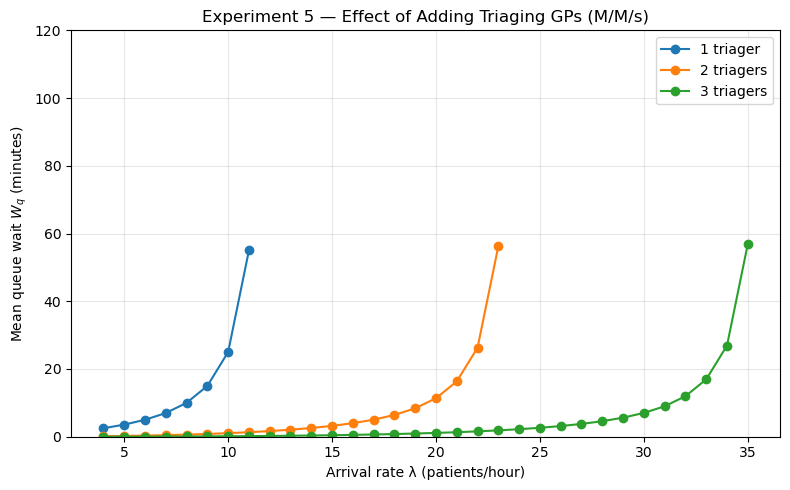

In [57]:
"""
Experiment 5: Effect of Adding Triaging GPs (M/M/s)
----------------------------------------------------

Model a triage system with multiple GPs (servers) working in parallel,
using the M/M/s queueing model.

Objective:
Quantify how adding additional triaging GPs (s) affects mean waiting time
in the queue (Wq), assuming each GP triages at the same average rate (Œº).

Assumptions:
- Poisson arrivals (Œª per hour)
- Exponential service times with mean rate Œº = 12 patients/hour (~5 min per case)
- Servers work independently but share the same queue
- Number of triagers s ‚àà {1, 2, 3}
- Erlang C formula for the probability of waiting:
    expressed in the MD cell above
- Mean waiting time in queue:
    formula expressed in the MD cell above
"""

import math
import numpy as np
import matplotlib.pyplot as plt


def erlang_c(lam: float, mu: float, s: int) -> float:
    """
    Calculate the Erlang C probability (Pw),
    the probability that an arrival has to wait,
    for an M/M/s queue.

    Parameters
    ----------
    lam : float
        Arrival rate (patients/hour)
    mu : float
        Service rate per server (patients/hour)
    s : int
        Number of servers (triaging GPs)

    Returns
    -------
    float
        Probability that an arrival must wait (Erlang C)
    """
    rho = lam / (s * mu)
    if rho >= 1:
        return 1.0  # an unstable system - return result for 100$ utliisation

    num = (lam / mu) ** s / (math.factorial(s) * (1 - rho))
    denom = sum((lam / mu) ** n / math.factorial(n) for n in range(s)) + num
    return num / denom


def mean_wait_mm_s(lam: float, mu: float, s: int) -> float:
    """
    Compute the mean waiting time in queue (Wq, hours)
    for an M/M/s queue using the Erlang C formula.

    Parameters
    ----------
    lam : float
        Arrival rate (patients/hour)
    mu : float
        Service rate per server (patients/hour)
    s : int
        Number of servers

    Returns
    -------
    float
        Mean waiting time in queue (hours)
    """
    rho = lam / (s * mu)
    if rho >= 1:
        return np.inf  # unstable system, work with 100$ utilisation
    Pw = erlang_c(lam, mu, s)
    return Pw / (s * mu - lam)


def plot_mm_s_waiting_times(mu: float, lambdas: np.ndarray, servers: list[int]) -> None:
    """
    Plot mean waiting time in queue (minutes) versus arrival rate (Œª)
    for different numbers of triaging GPs (s).

    Parameters
    ----------
    mu : float
        Service rate per GP (patients/hour)
    lambdas : np.ndarray
        Array of arrival rates (patients/hour)
    servers : list[int]
        List of numbers of GPs (servers) to simulate
    """
    plt.figure(figsize=(8, 5))

    for s in servers:
        Wq_hours = np.array([mean_wait_mm_s(lam, mu, s) for lam in lambdas])
        Wq_minutes = 60 * Wq_hours
        plt.plot(lambdas, Wq_minutes, marker="o", label=f"{s} triager{'s' if s > 1 else ''}")

    plt.xlabel("Arrival rate Œª (patients/hour)")
    plt.ylabel("Mean queue wait $W_q$ (minutes)")
    plt.title("Experiment 5 ‚Äî Effect of Adding Triaging GPs (M/M/s)")
    plt.ylim(0, 120)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# --- Parameters ---
mu = 12.0                  # each GP: 12 patients/hour (=5 min)
lambdas = np.arange(4, 41) # arrivals per hour
servers = [1, 2, 3]        # 1, 2, or 3 triagers


# --- Execution ---
plot_mm_s_waiting_times(mu, lambdas, servers)

### Experiment 5: Results

This model helps to predict the effect on mean waiting times when additional GPs are assigned to triage in parallel.

The results suggest that adding triage resource flattens the curve and allows for smooth, rapid handling of cases during times of low or average demand. 

In all cases, as the system approaches capacity ($\rho$ aprroaches 1.0), waiting times sharply rise.

This information can potentially allow an organisation to plan for busy periods: Monday mornings, or after a bank holiday- deploying more triaging doctors and meeting the expected rise in demand.

Experiment 6 seeks to quantify this by asking the question "how many triaging GPs are needed to meet a service target?"

## Experiment 6: Capacity planning (M/M/s)


As described in experiment 5, the probability that a patient must wait at all, $P_W$, comes from the Erlang C formula for the M/M/s queue:
$$P_W
= 
\frac{
\dfrac{(\lambda / \mu)^s}{s!\,(1 - \rho)}
}{
\displaystyle
\sum_{n=0}^{s-1} \frac{(\lambda / \mu)^n}{n!}
\;+\;
\dfrac{(\lambda / \mu)^s}{s!\,(1 - \rho)}
},
\qquad
\rho = \frac{\lambda}{s\mu}.$$

If the patient must wait, then the waiting time is exponentially distributed with rate $s\mu - \lambda$:

$$P(W_q > t \mid \text{must wait}) = e^{-(s\mu - \lambda)t}$$

By total (unconditional) probability:

$$P(W_q \le t) = 1 - P_W\, e^{-(s\mu - \lambda)t}$$

In this ewperiment, we ask "how many triagers (servers, $s$) are needed to meet the service target on 90% of cases started within $t$ = 30 minutes, for a range of arrival rates $(\lambda)$?



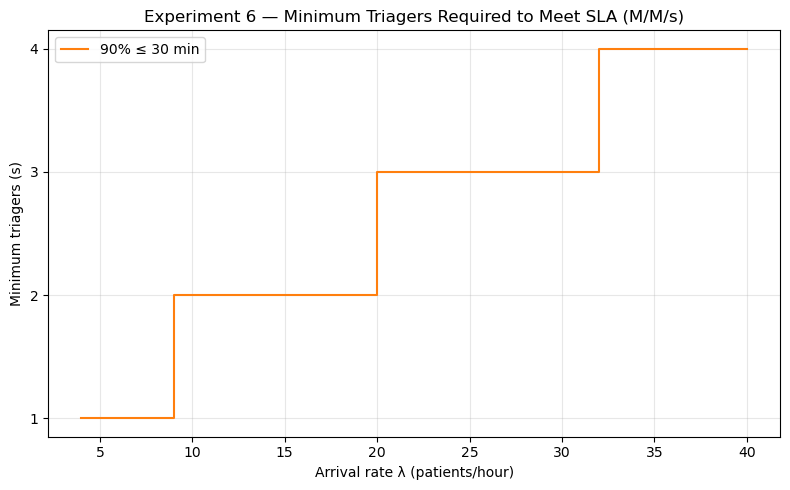

In [58]:
"""
Experiment 6: Minimum Staffing to Meet SLA (M/M/s)
----------------------------------------------------

Model a triage system with multiple GPs (servers) using an M/M/s queue.

Objective:
Determine the minimum number of triaging GPs (s) required to meet a
specific Service Level Agreement (SLA), e.g. 90% of triage requests
must start within 30 minutes.

Assumptions:
- Poisson arrivals (Œª per hour)
- Exponential service times with mean rate Œº = 12 patients/hour (= 5 min per case)
- Shared single queue served by s identical triagers
- SLA target: 90% of patients begin triage within 30 minutes
- Erlang C probability of waiting:
    formula expressed in the MD cell above
- Probability that a patient starts triage within time t:
    formula expressed in the MD cell above
"""

import math
import numpy as np
import matplotlib.pyplot as plt


def erlang_c(lam: float, mu: float, s: int) -> float:
    """
    Calculate the Erlang C probability (Pw),
    the probability that an arrival must wait, for an M/M/s queue.

    Parameters
    ----------
    lam : float
        Arrival rate (patients/hour)
    mu : float
        Service rate per server (patients/hour)
    s : int
        Number of servers (triaging GPs)

    Returns
    -------
    float
        Probability that an arrival must wait
    """
    rho = lam / (s * mu)
    if rho >= 1:
        return 1.0  # unstable system, work with 100% utilisation
    a = lam / mu
    num = (a**s) / (math.factorial(s) * (1 - rho))
    denom = sum((a**n) / math.factorial(n) for n in range(s)) + num
    return num / denom


def p_wait_leq_t(lam: float, mu: float, s: int, t_hours: float) -> float:
    """
    Calculate the probability that a patient waits ‚â§ t_hours
    in an M/M/s queue.

    Parameters
    ----------
    lam : float
        Arrival rate (patients/hour)
    mu : float
        Service rate per server (patients/hour)
    s : int
        Number of servers
    t_hours : float
        Target wait threshold (hours)

    Returns
    -------
    float
        Probability that waiting time ‚â§ t_hours
    """
    if lam >= s * mu:
        return 0.0  # unstable system return probability 0
    Pw = erlang_c(lam, mu, s)
    rate = s * mu - lam
    return 1.0 - Pw * math.exp(-rate * t_hours)


def min_servers_for_sla(lam: float, mu: float, t_hours: float, target: float = 0.9, s_max: int = 20) -> float:
    """
    Determine the minimum number of servers (s)
    required to meet an SLA target (P(Wq ‚â§ t) ‚â• target).

    Parameters
    ----------
    lam : float
        Arrival rate (patients/hour)
    mu : float
        Service rate per server (patients/hour)
    t_hours : float
        SLA threshold time (hours)
    target : float, default = 0.9
        Target probability (e.g. 0.9 for 90%)
    s_max : int, default = 20
        Maximum number of servers to test

    Returns
    -------
    float
        Minimum s meeting SLA, or NaN if not found
    """
    for s in range(1, s_max + 1):
        if lam < s * mu:
            pw_leq = p_wait_leq_t(lam, mu, s, t_hours)
            if pw_leq >= target:
                return s
    return np.nan


def plot_min_servers_for_sla(
    lambdas: np.ndarray,
    mu: float,
    t_hours: float,
    target: float,
) -> None:
    """
    Plot the minimum number of triagers (s) required
    to meet a given SLA for various arrival rates.

    Parameters
    ----------
    lambdas : np.ndarray
        Array of arrival rates (patients/hour)
    mu : float
        Service rate per server (patients/hour)
    t_hours : float
        SLA threshold (hours)
    target : float
        SLA target probability (e.g. 0.9)
    """
    s_required = [min_servers_for_sla(lam, mu, t_hours, target) for lam in lambdas]

    plt.figure(figsize=(8, 5))
    plt.step(lambdas, s_required, where="post", color="tab:orange", label=f"{int(target*100)}% ‚â§ {int(t_hours*60)} min")

    plt.xlabel("Arrival rate Œª (patients/hour)")
    plt.ylabel("Minimum triagers (s)")
    plt.title("Experiment 6 ‚Äî Minimum Triagers Required to Meet SLA (M/M/s)")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.yticks(range(1, int(np.nanmax(s_required)) + 1))
    plt.tight_layout()
    plt.show()


# --- Parameters ---
mu = 12.0                  # service rate per triager (patients/hour)
target = 0.90              # SLA: 90% start within t
lambdas = np.arange(4, 41) # arrivals/hour: 4‚Äì40
t_30 = 30 / 60             # 30 minutes in hours


# --- Execution ---
plot_min_servers_for_sla(lambdas, mu, t_30, target)


### Experiment 6: Results

As the arrival rate increases, the nuber of triaging GPs required to meet the service target also increases but this relationship is non-linear.

- if arrival rate ($\lambda$) is <= 8 requests per hour, then one GP is needed.
- if arrival rate ($\lambda$) is between 9 and 19, then two GPs are needed.
- if arrival rate ($\lambda$) is between 20 and 31, then three GP are needed.
- if arrival rate is greater than 32, then at least 4 GPs are meeded

The results of this model could help an organisation plan for times of expected increase in demand, such as Monday morning or after a bank holiday, or during an epidemic.

## Summary and Conclusion

In this assignment, I have implemented and explored three queuing models M/M/1, M/G/1 and M/M/s, and applied these to scenarios reflecting online triage in General Practice.

These models confirms what might intuitively be expected. For example, that at busy times, a GP might achieve better system performance by shortening triage interactions. or that additional traiging staff are neeed as demand increases.

But importantly, these models can help to quantify these relationships. They provide a framework which might allow a clinician to calibrate their triage style depending on workload; or allow an organisation to plan specifically for busy periods by predicting exactly how many triaging staff might be required to meet service targets.

## Limitations

Several of the assumptions used in this study are simplified or arbirtary. For example, that 90% of triage requests should be started with 30 minutes, or that each takes an average 10 minutes to complete or 3 minutes to signpost.

In reality, these values may vary from orgnaisation to organisation and from practitioner to practitoner.

However, by implementing the models in Python, these parameters can be easily adjusted, allowing the same framework to be reused for different settings, service targets, and consultation styles.

## Future work

Future work could aim to remove some of the simplifying assumptions made in this study. 
This might includes modelling arrival rates which vary from day to day or season to season; introducing patient priority classes such as "urgent" and "routine", and agreeing service targets with the organisations using the models.

Analytically, further development could combine queueing theory with discrete-event 
simulation to validate and extend results. Optimisation methods could then identify 
the most cost-effective staffing levels for given service targets. 

To further validate these models they could be applied to real primary-care triage data, or extended to include AI-assisted triage.



## Generative AI usage

I made use of generative AI in developing this project, in line with the assignment brief. ChatGPT 5 was used:

- to develop ideas
- to assist with research and gathering information about mathematical formulas
- to help understand key concepts
- to learn how to format mathematical expression using latex
- to provide feedback on drafts
- to provide feeback on formatting and layout of my python code

The prompts used are listed in the cell below:

### List of Gen AI Prompts

1. The course is data science for health care. The Module is coding skills for data science. My background is as a primary care doctor. I want to bring examples from my healthcare work to my academic work. May I paste the assignment brief? [Pasted full assignment brief for Coding Skills for Data Science]

2. This is a good outline. Instead of C, can we have a flu vaccination clinic with 6 vaccinators?

3. I am a beginner with Jupyter notebooks. How should I start approaching this?

4. In bash, how to exit Jupyter Lab?

5. How to make a markdown cell?

6. Would you like me to make you a ‚Äústarter notebook template‚Äù with the Markdown sections already laid out, plus placeholder code cells (with # TODO: implement here)? That way, you just open it in Jupyter and fill it in step by step. YES

7. Why does queueing matter in health care and what are the M/M/s, M/M/1, and M/G/1 models?

8. Is this a good plain English introduction? [You pasted your introductory section on queueing in healthcare.]

9. Planned experiments (up to six total). I want to do these experiments. Can you help me set them up? Are they good?
A. GP Same-day Triage (M/M/1) ‚Äî two experiments
B. Minor Op clinic (M/G/1) ‚Äî two experiments
C. Flu Vaccination Clinic (M/M/s, s=6) ‚Äî two experiments

10. Can you help me with a new starter Jupyter notebook with these refinements?

11. in jupyter labs, how do I make a.gif image smaller? Currently it expands to fill the page and I dont want this

12. My python code is no more than 80 chars wide. Can I adjust the MD cells to have a similar width?

13. can you give me the Lambert W function in MD

14. I mean, the exact equation described above Œº=t1W(0.1ŒªteŒªt). but in Latex

15. what does W represent in this equation?

16. Does my python function solve that equation? ‚Äúdef mm1_metrics(mu: float, lambdas: np.ndarray) -> tuple[np.ndarray, np.ndarray]: ... return rho, wq_minutes.""

17. In experiments A1 and A2 I have calculated the service rate required for 90% of triages to start within 20 minutes. For experiment A3, I want to explore the GP's choice to COMPLETE the triage himself (takes 10 minutes) or signpost to another provoider (takes 3) minutes. What calculations and experiment can help inform this choice, based on A1 and A2?‚Äù

18. i want to limit max Wq on that chart to 180

19. what is the difference between gaussian and exponential distribution‚Äù

20. return np.clip((60/mu_req - 3)/7, 0, 1). what formula am I using here?‚Äù

21. How to show inline math?

22. give me the formula for variance in latex

23. give me this formula in latex: pmax=min(1,max(0,760/Œºreq‚àí3))

24. here is my code; give me a MD explantion including the key formula

25. Wq=2(1‚àíœÅ)ŒªE[S2]h2(hours). give me this ln latex

26. Pollaczek‚ÄìKhinchine formula: what is this?

27. I have completed 4 out of 6 experiments. The remaining 2 should be M/M/S. I am wondering about extending the GP Triage scenario but addind a second triager? Can you think of 2 easy experiments like that?

28. Wq=sŒº‚àíŒªPW. give me in latex

29. how can I use mathplotlib to plot Wq with 1,2,3 and 4 triagers?

30. I'd like to try a variation on this. For lambdas from 4 through 40, determine the minimum number of GP triagers to meet the service specification of 90% of triage calls started within 20 minutes‚Äù

31. plot two lines: 90% within 20 minutes and 90% within 30 minutes

32. PW=n=0‚àës‚àí1n!(Œª/Œº)n+s!(1‚àíœÅ)(Œª/Œº)ss!(1‚àíœÅ)(Œª/Œº)s,œÅ=sŒºŒª. give the the latex for this please

33. P(Wq>t‚à£must wait)=e‚àí(sŒº‚àíŒª)t. in latex

34. Can you critique my work so far?

35. Why is f(t) = Œªe‚àíŒªt exponential, and how can the service rate be constant?

36. What is fig.tight_layout?

37. In my Jupyter notebook, should I include this as one cell or multiple cells? [You pasted Experiment 1 code.]

38. I want the first bit to be a docstring not Markdown. Does this affect your answer?

39. Please add a Markdown interpretation paragraph for Experiment 1.

40. ‚ÄúExperiment 2 ‚Äî Meeting service target (M/M/1)‚Äù [You pasted your Lambert W function experiment and asked for formatting.]

41. How can I format Experiment 3 ‚Äî Complete or Signpost? (M/G/1) in the same way that I have formatted experiments 1 and 2?

42. If I have already made the imports earlier in the notebook for a different experiment, do I need to import again?

43. mus_required = np.array([calculate_mu_required(lam, t target) for lam in lambdas]) what is wrong?

44. help me format experiments 4, 5 and 6 in the same way.

44. Export all the prompts in this project to a list.

## References

1. Appointments in General Practice, October 2022. NHS Digital; 2022.

2. Banks JC, John. Nelson, Barry. Nicol, David. Discrete Event System Simulation. 4th Edition ed. 2014:chap 5 Statistical Models in Simulation; 6 Queueing Models.

3. Pettigrew LM, Petersen I, Mays N, Cromwell D. The changing shape of English general practice: a retrospective longitudinal study using national datasets describing trends in organisational structure, workforce and recorded appointments. BMJ Open. 2024;14(8):e081535. doi:10.1136/bmjopen-2023-081535